<a href="https://colab.research.google.com/github/Savannah-Stuart10/TaylorSwiftData/blob/main/Taylor_Swift_Album_Ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Want to know your Taylor Swift album ranking? Use the provided excel file--can send for you to download--and see which Era you vibe with the most!

*Do not change any of the code or the functions inside of this script or the excel file. In this excel file, only change the numbers listed next to each song. Do not change anything else.*

Run the following block of code as is.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import your excel file into the files tab from your computer. Once imported, copy the file path and paste it in between the ''.

After pasting your file path, run the next line of code.

In [42]:
file_path = '/content/Colab Taylor Swift Rankings.xlsx' #This is where you want to put in your file path to your own rankings.
df = pd.read_excel(file_path)
df.head()

,Debut,Rating-D,Fearless (TV),Rating -F,Speak Now (TV),Rating-S,Red (TV),Rating-R,1989 (TV),Rating-1989,...,Lover,Rating-L,Folklore,Rating -Folk,Evermore,Rating - E,Midnights,Rating - M,The Tortured Poets Department,Rating - TTPD
0,Tim McGraw,7.0,Jump Then Fall,3.0,Mine,8.0,State of Grace,8.0,Welcome to New York,7.0,...,I Forgot That You Existed,6.0,The 1,8.0,Willow,4.0,Lavender Haze,7.0,Fortnight,9.0
1,Picture to Burn,8.0,Untouchable,5.0,Sparks Fly,6.0,Red,6.0,Blank Space,6.0,...,Cruel Summer,8.0,Cardigan,7.0,Champagne Problems,8.0,Maroon,10.0,The Tortured Poets Department,10.0
2,Teardrops on My Guitar,8.0,Forever and Always,9.0,Back to December,9.0,Treacherous,7.0,Style,10.0,...,Lover,10.0,The Last Great American Dynasty,8.0,Gold Rush,8.0,Anti-Hero,6.0,My Boy Only Breaks His Favorite Toys,8.0
3,A Place in This World,8.0,Come In with the Rain,10.0,Speak Now,7.0,I Knew You Were Trouble,8.0,Out of the Woods,9.0,...,The Man,9.0,Exile,8.0,Tis the Damn Season,4.0,Snow on the Beach,4.0,Down Bad,7.0
4,Cold as You,5.0,Superstar,3.0,Dear John,9.0,All Too Well,7.0,All You Had to Do Was Stay,6.0,...,The Archer,6.0,My Tears Ricochet,10.0,Tolerate It,8.0,"You're on Your Own, Kid",8.0,"So Long, London",8.0


Run this next line of code.

This will line up the index--which is the very left-most row in the dataframe--to start at one instead of 0.

In [43]:
df.drop(0, inplace=True)
df.head()

,Debut,Rating-D,Fearless (TV),Rating -F,Speak Now (TV),Rating-S,Red (TV),Rating-R,1989 (TV),Rating-1989,...,Lover,Rating-L,Folklore,Rating -Folk,Evermore,Rating - E,Midnights,Rating - M,The Tortured Poets Department,Rating - TTPD
1,Picture to Burn,8.0,Untouchable,5.0,Sparks Fly,6.0,Red,6.0,Blank Space,6.0,...,Cruel Summer,8.0,Cardigan,7.0,Champagne Problems,8.0,Maroon,10.0,The Tortured Poets Department,10.0
2,Teardrops on My Guitar,8.0,Forever and Always,9.0,Back to December,9.0,Treacherous,7.0,Style,10.0,...,Lover,10.0,The Last Great American Dynasty,8.0,Gold Rush,8.0,Anti-Hero,6.0,My Boy Only Breaks His Favorite Toys,8.0
3,A Place in This World,8.0,Come In with the Rain,10.0,Speak Now,7.0,I Knew You Were Trouble,8.0,Out of the Woods,9.0,...,The Man,9.0,Exile,8.0,Tis the Damn Season,4.0,Snow on the Beach,4.0,Down Bad,7.0
4,Cold as You,5.0,Superstar,3.0,Dear John,9.0,All Too Well,7.0,All You Had to Do Was Stay,6.0,...,The Archer,6.0,My Tears Ricochet,10.0,Tolerate It,8.0,"You're on Your Own, Kid",8.0,"So Long, London",8.0
5,The Outside,3.0,The Other Side of the Door,8.0,Mean,8.0,Twenty Two,8.0,Shake It Off,7.0,...,I Think He Knows,7.0,Mirrorball,7.0,"No Body, No Crime",10.0,Midnight Rain,7.0,But Daddy I Love Him,7.0


Run this next line of code.  

This code is first interating through the columns to pair the album name with its respective rating column.

It then creates a dictionary of song titles to their respective rankings, as well as excluding NaN values

For this step, it is really important that you keep the excel file consistent with the original besides your own number rankings. Changing the format of the file will mess with this step and you will not be able to drop NaN values.

In [44]:
album_ratings_dict = {}

for i in range(0, len(df.columns), 2):
    album_col_name = df.columns[i]
    rating_col_name = df.columns[i + 1]
    song_ratings = {}
    for index, row in df.iterrows():
        rating = row[rating_col_name]
        if pd.notna(rating):
            song_ratings[row[album_col_name]] = rating
    album_ratings_dict[album_col_name] = song_ratings

Once everything is inside of an album dictionary, we now need to calculate the average rating of the songs within that album.

Thank god for numpy, am I right 😆

In [45]:
average_album_ratings = {}

for album, song_ratings in album_ratings_dict.items():
    ratings = list(song_ratings.values())
    if ratings:
        average_rating = np.mean(ratings)
        average_album_ratings[album] = average_rating

Running the next line of code will give us a list of tuples that stores the album names and their average ranking, sorting them into descending order based on the rating score.

The second part of this code is actually printing the ranking for you to visually see it.

In [46]:
album_avg_ratings_list = list(average_album_ratings.items())
sorted_album_ratings = sorted(album_avg_ratings_list, key=lambda item: item[1], reverse=True)

print("Taylor Swift Album Ranking (by average song rating):")
for i, (album, avg_rating) in enumerate(sorted_album_ratings):
    print(f"{i + 1}. {album}: {avg_rating:.2f}")

Taylor Swift Album Ranking (by average song rating):
1. Folklore: 8.12
2. Reputation: 7.93
3. Evermore: 7.92
4. Midnights: 7.76
5. The Tortured Poets Department: 7.63
6. 1989 (TV): 7.45
7. Fearless (TV): 7.37
8. Red (TV): 7.07
9. Speak Now (TV): 6.67
10. Debut: 6.54
11. Lover: 6.37


Just incase you want you data to look visually appealing 😀

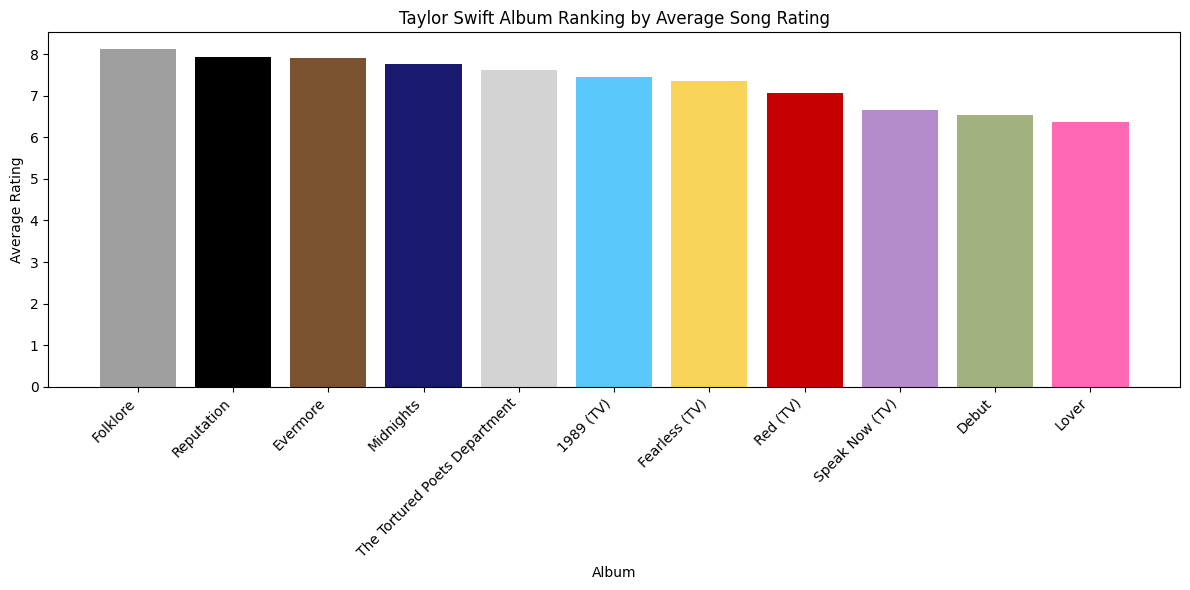

In [50]:
albums = [album for album, avg_rating in sorted_album_ratings]
avg_ratings = [avg_rating for album, avg_rating in sorted_album_ratings]


era_colors = {
    'Debut': '#A1B17F',
    'Fearless (TV)': '#F8D45A',
    'Speak Now (TV)': '#B48BCB',
    'Red (TV)': '#C60000',
    '1989 (TV)': '#5AC8FA',
    'Reputation': '#000000',
    'Lover': '#FF69B4',
    'Folklore': '#9F9F9F',
    'Evermore': '#7A5230',
    'Midnights': '#191970',
    'The Tortured Poets Department': '#D3D3D3'
}

bar_colors = [era_colors.get(album, '#808080') for album in albums]


plt.figure(figsize=(12, 6))
plt.bar(albums, avg_ratings, color=bar_colors)
plt.xlabel("Album")
plt.ylabel("Average Rating")
plt.title("Taylor Swift Album Ranking by Average Song Rating")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()